In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=18,8
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('trend.csv')

In [3]:
data

,login_date,sales
0,01-Jan-14,120
1,02-Jan-14,122
2,03-Jan-14,132
3,04-Jan-14,136
4,05-Jan-14,145
5,06-Jan-14,156
6,07-Jan-14,160
7,08-Jan-14,169
8,09-Jan-14,200
9,10-Jan-14,211


In [4]:
data.isnull().sum()

login_date    0
sales         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_date  31 non-null     object
 1   sales       31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [6]:
data['login_date']=pd.to_datetime(data['login_date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_date  31 non-null     datetime64[ns]
 1   sales       31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 624.0 bytes


In [8]:
data

,login_date,sales
0,2014-01-01,120
1,2014-01-02,122
2,2014-01-03,132
3,2014-01-04,136
4,2014-01-05,145
5,2014-01-06,156
6,2014-01-07,160
7,2014-01-08,169
8,2014-01-09,200
9,2014-01-10,211


In [9]:
data=data.set_index('login_date')

In [10]:
data

,sales
login_date,
2014-01-01,120
2014-01-02,122
2014-01-03,132
2014-01-04,136
2014-01-05,145
2014-01-06,156
2014-01-07,160
2014-01-08,169
2014-01-09,200


<AxesSubplot:xlabel='login_date'>

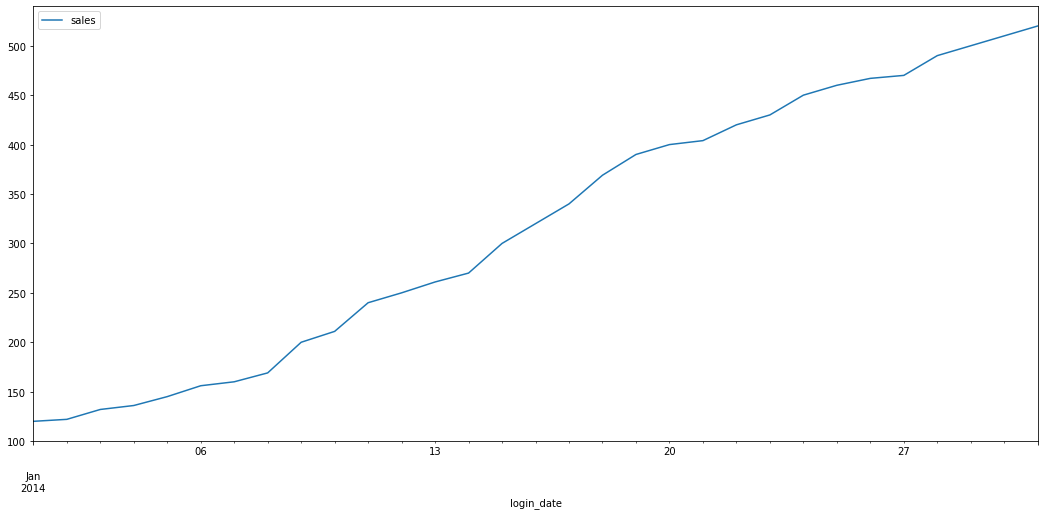

In [11]:
data.plot()

# lets check the data is stationary or not

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result=adfuller(data)

In [14]:
result[1]

0.9639660116664333

In [15]:
if result[1]>0.05:
        print("This Data is Not Stationary - Accept NULL Hypothesis")
else:
        print("This Data is Stationary - Reject NULL Hypothesis")

This Data is Not Stationary - Accept NULL Hypothesis


# So we need to do rolling statistics

In [16]:
data_10th_rolling=data.rolling(10,min_periods=0).mean()

In [17]:
data_10th_rolling

,sales
login_date,
2014-01-01,120.000000
2014-01-02,121.000000
2014-01-03,124.666667
2014-01-04,127.500000
2014-01-05,131.000000
2014-01-06,135.166667
2014-01-07,138.714286
2014-01-08,142.500000
2014-01-09,148.888889


In [18]:
adf=adfuller(data_10th_rolling)

if adf[1]>0.05:
        print("This Data is Not Stationary - Accept NULL Hypothesis")
else:
        print("This Data is Stationary - Reject NULL Hypothesis")

This Data is Not Stationary - Accept NULL Hypothesis


In [19]:
data

,sales
login_date,
2014-01-01,120
2014-01-02,122
2014-01-03,132
2014-01-04,136
2014-01-05,145
2014-01-06,156
2014-01-07,160
2014-01-08,169
2014-01-09,200


# Differencing

In [20]:
differencing=data-data.shift(1)

In [21]:
differencing

,sales
login_date,
2014-01-01,NaN
2014-01-02,2.0
2014-01-03,10.0
2014-01-04,4.0
2014-01-05,9.0
2014-01-06,11.0
2014-01-07,4.0
2014-01-08,9.0
2014-01-09,31.0


In [22]:
differencing=differencing.fillna(differencing.sales.mean())

In [23]:
differencing

,sales
login_date,
2014-01-01,13.333333
2014-01-02,2.000000
2014-01-03,10.000000
2014-01-04,4.000000
2014-01-05,9.000000
2014-01-06,11.000000
2014-01-07,4.000000
2014-01-08,9.000000
2014-01-09,31.000000


In [24]:
roll_mean_new=differencing.rolling(12,min_periods=0).mean()
roll_std_new=differencing.rolling(12,min_periods=0).std()

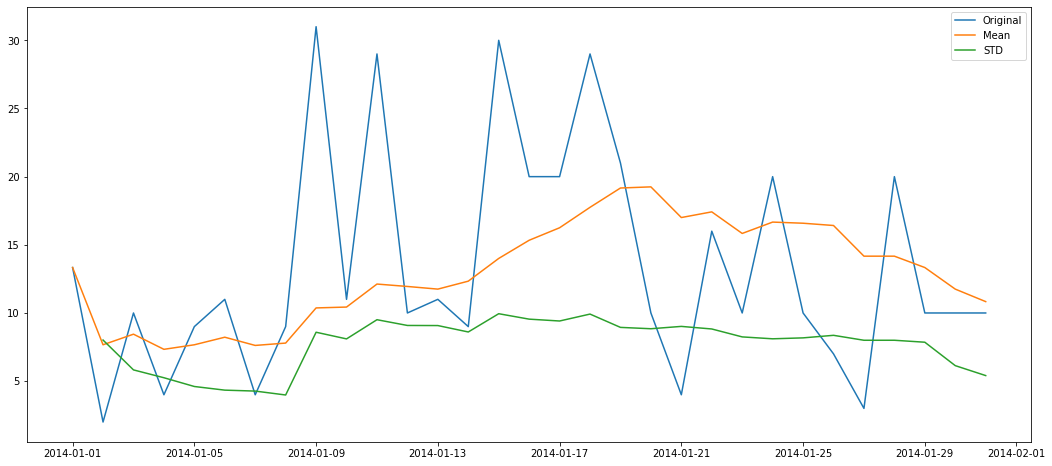

In [25]:
original=plt.plot(differencing,label="Original")
mean=plt.plot(roll_mean_new,label="Mean")
std=plt.plot(roll_std_new,label="STD")
plt.legend(loc="best")

In [26]:
result_2=adfuller(differencing,autolag='AIC')

if result_2[1]>0.05:
        print("This Data is Not Stationary - Accept NULL Hypothesis")
else:
        print("This Data is Stationary - Reject NULL Hypothesis")

This Data is Stationary - Reject NULL Hypothesis


# Now Data is Stationary

In [27]:
len(differencing)

31

# Lets Split Train and Test Data

In [28]:
train=differencing[:25]

In [29]:
train

,sales
login_date,
2014-01-01,13.333333
2014-01-02,2.000000
2014-01-03,10.000000
2014-01-04,4.000000
2014-01-05,9.000000
2014-01-06,11.000000
2014-01-07,4.000000
2014-01-08,9.000000
2014-01-09,31.000000


In [30]:
test=differencing[25:]

In [31]:
test

,sales
login_date,
2014-01-26,7.0
2014-01-27,3.0
2014-01-28,20.0
2014-01-29,10.0
2014-01-30,10.0
2014-01-31,10.0


In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model=ARIMA(train,order=(5,0,4)).fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [34]:
y_pred=model.predict(start=len(train),end=len(differencing)-1)

In [35]:
y_pred

2014-01-26    11.595093
2014-01-27    13.327286
2014-01-28    15.821846
2014-01-29     9.960667
2014-01-30    16.574220
2014-01-31    15.252845
Freq: D, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
error=np.sqrt(mean_squared_error(y_pred,test))

In [38]:
error

6.00054133179055

# Lets predict For next 10 days data

In [39]:
y_pred_next_10_days=model.predict(start=len(train),end=len(differencing)+10)

In [40]:
y_pred_next_10_days

2014-01-26    11.595093
2014-01-27    13.327286
2014-01-28    15.821846
2014-01-29     9.960667
2014-01-30    16.574220
2014-01-31    15.252845
2014-02-01    12.098108
2014-02-02    15.613907
2014-02-03    16.724517
2014-02-04    11.674615
2014-02-05    15.882164
2014-02-06    16.616484
2014-02-07    12.092655
2014-02-08    15.258462
2014-02-09    17.001932
2014-02-10    12.058766
2014-02-11    14.985387
Freq: D, dtype: float64

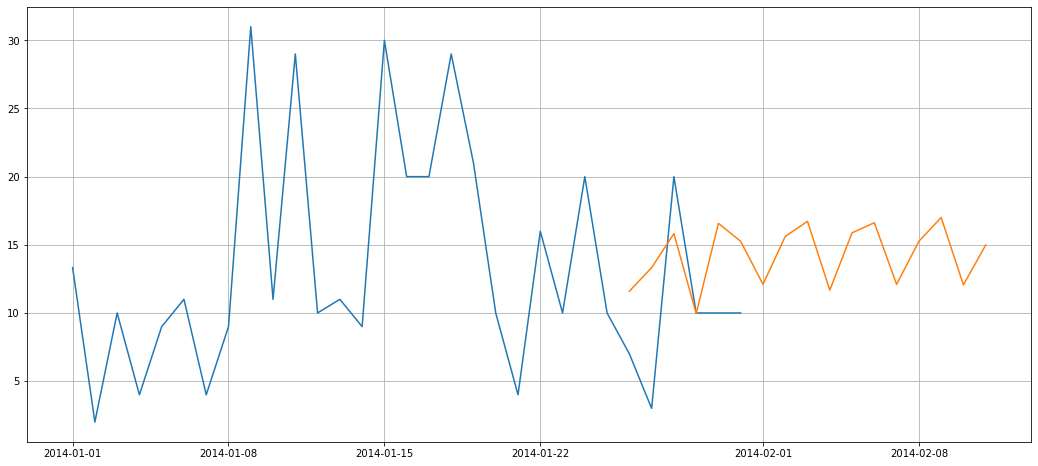

In [41]:
plt.plot(differencing)
plt.plot(y_pred_next_10_days)
plt.grid()

In [42]:
import itertools

In [43]:
p=range(0,8)
d=range(0,2)
q=range(0,8)

pdq_combination= list(itertools.product(p,d,q))

In [44]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [45]:
len(pdq_combination)

128

In [48]:
rmse=[]
order=[]
for pdq in pdq_combination:
    try:
        model_1=ARIMA(train,order=pdq).fit()
        pred=model_1.predict(start=len(train),end=(len(differencing)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order_1.append(pdq)
        rmse.append(error)
    except:
        continue

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information wa

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information 

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood opt

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information wa

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, 